## Marketing Machine Learning Models
### Notebook by Kymberly Ayodeji

### Step 0: Install Libraries and Packages

In [17]:
# Numerical 
import pandas as pd
import numpy as np

# Import Machine Learning libraries
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

# Graphical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1: Load Data
- 1.1 Load data set from pickle file
- 1.2 Identify features and target

In [5]:
# 1.1 Load data
features_df = pd.read_pickle("artifacts/ml_dataset_df.pkl")
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23570 entries, 1 to 23570
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   recency        23570 non-null  int64  
 1   frequency      23570 non-null  int64  
 2   monetary       23570 non-null  float64
 3   duration       23570 non-null  int64  
 4   avg_price      23570 non-null  float64
 5   max_price      23570 non-null  float64
 6   spend_total    23570 non-null  float64
 7   n_days_spend?  23570 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.6 MB


In [6]:
# 1.2 Identity Features (X) and target (y)
X = features_df[['recency', 'frequency','monetary','duration', 'avg_price', 'max_price']]
y = features_df['spend_total']

## Step 2: Build Models
- 2.1 Regression model using XGBoost to predict price
- 2.2 Classification model to predict 

In [8]:
# 2.1a Instantiate XGBoost model
xgb_spec = XGBRegressor(objective="reg:squarederror", random_state=522)
# Parameters to tune using GridSearchCV
xgb_model = GridSearchCV(estimator=xgb_spec,
                        param_grid=dict(
                            learning_rate = [0.01, 0.1, 0.3, 0.5],
                            min_split_loss = [0.1, 1, 5, 10],
                            sampling_method=['uniform','subsample','gradient_based']
                            ),
                        scoring = 'neg_mean_absolute_error',
                        refit = True,
                        cv = 5
                        )

In [9]:
# 2.1b Fit the model with the data
xgb_model.fit(X,y)

c:\Users\kymno\miniconda3\envs\marketing\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
160 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\kymno\miniconda3\envs\marketing\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\kymno\miniconda3\envs\marketing\Lib\site-packages\xgboost\core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "c:\Users\kymno\miniconda3\envs\marketing\Lib\site-packages\xgboost\sklearn.py", line 1090, in fit
    self._Bo

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=522, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5],
                         'min_split_loss': [0.1, 1, 5, 10],
                         'sampling_method': ['uniform', 'subsample',
                                             'gradient_based']},
             scoring='neg_mean_absolute_error')

In [10]:
# Metrics
print(f"Best Score: {xgb_model.best_score_}")
print(f"Best Parameters: {xgb_model.best_params_}")

Best Score: -15.71325101557579
Best Parameters: {'learning_rate': 0.1, 'min_split_loss': 5, 'sampling_method': 'uniform'}


In [11]:
# Store Predictions
regression_predictions = xgb_model.predict(X)

<Axes: ylabel='spend_total'>

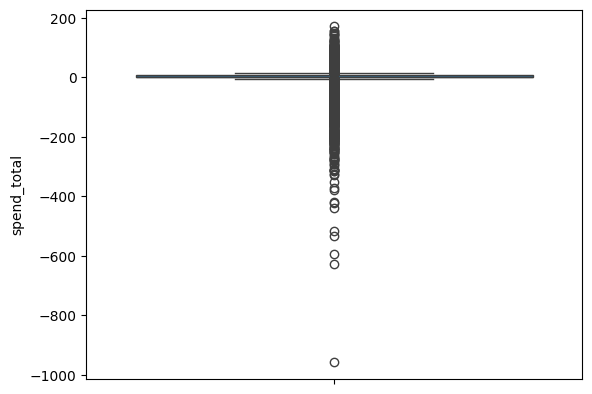

In [21]:
# Compare Predictions
residual = regression_predictions - features_df['spend_total']
sns.boxplot(residual)

In [20]:
residual.mean()

-0.023257808882020926

In [24]:
print(f"Range: ${residual.min():.2f} - ${residual.max():.2f}, \
      Count {len(residual)}, \
      Q1:{ np.percentile(residual, 25):.2f}, \
      median:{ np.percentile(residual, 50):.2f},\
      Q3: { np.percentile(residual, 75):.2f}"
    )

Range: $-958.32 - $171.89,       Count 23570,       Q1:1.54,       median:2.10,      Q3: 6.62
